In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

<h3>Machine Learning Model</h3>

In [2]:
#load data from csv
dt = pd.read_csv("mlDataTrain.csv")

In [3]:
#select the fit array
X = np.array(dt[['mag', 'tsunami', 'depth']])

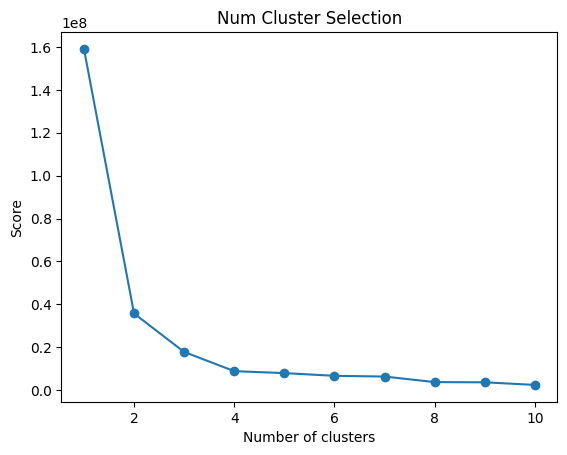

In [4]:
#choosing the best number of cluster
Score = []
for i in range(1, 11):
    kmeans_model = KMeans(
        n_clusters=i, init='random',
        n_init='auto',
        random_state=0
    )

    kmeans_model.fit(X)
    Score.append(kmeans_model.inertia_)
#graph    
plt.plot(range(1, 11), Score, marker='o')
plt.title('Num Cluster Selection')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()


In [5]:
#model creation using args: mag, tsunami,depth
kmeans_model = KMeans(n_clusters=4, random_state=0, n_init="auto")

In [6]:
#training the model 
kmeans_model.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [7]:
#assign labels
dt['danger'] = kmeans_model.labels_

In [8]:
#load model in a pickle file
pickle.dump(kmeans_model, open('modelo_ml.pkl', 'wb'))

<h3>Testing</h3>

In [9]:
dt['danger'] = kmeans_model.labels_
dt.head()

,idsismo,idcountry,mag,place,time,tsunami,lng,lat,depth,danger
0,1,1,3.24,"11km N of Delta, B.C., MX",2010-01-01 02:33:42,0,-115.202833,32.453833,5.995,0
1,2,1,3.00,"10 km SW of Fairview, Wyoming",2010-01-01 04:13:44,0,-111.058000,42.616000,5.000,0
2,3,1,3.60,"10 km ESE of Maupin, Oregon",2010-01-02 16:36:45,0,-120.955500,45.137000,14.468,0
3,4,1,3.30,"19 km SE of Sleepy Hollow, Wyoming",2010-01-03 18:53:01,0,-105.271000,44.099000,0.000,0
4,5,1,3.81,"25km E of Primo Tapia, B.C., MX",2010-01-04 00:02:17,0,-116.655000,32.191500,5.631,0


In [42]:
dt.to_csv('mlDataLabeled.csv', index=False)

In [48]:
#to predict use this format kmeans_model(np.array([var1_mag, var2_tsunami, var3_depth]))
#label 0 = very dangerous
#label 2 = dangerous
#label 1 and 3 = few danger
kmeans_model.predict(np.array([8,0,70]).reshape(1,-1))

array([2], dtype=int32)